In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [22]:
data = pd.read_csv('Mall_Customers.csv')
print(data.head())
print(data.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [32]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())


In [36]:
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns
for col in non_numeric_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


C:\Users\Sudharsana\AppData\Local\Temp\ipykernel_19580\1311576732.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [40]:
print(data.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [42]:
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data after scaling:\n", X_scaled[:5])


Data after scaling:
 [[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


C:\Users\Sudharsana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sudharsana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sudharsana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sudharsana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a m

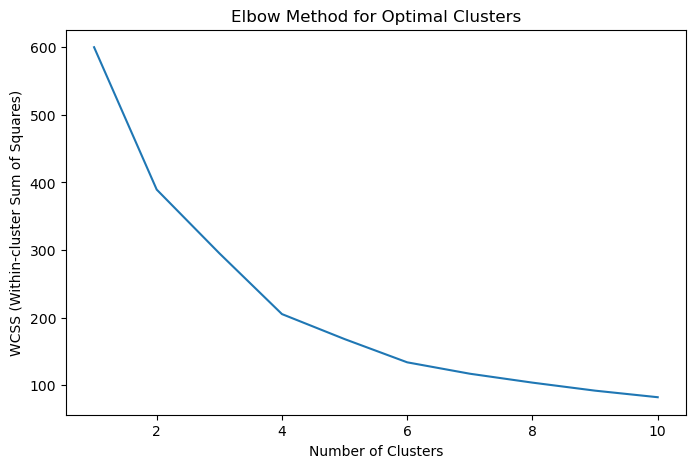

In [44]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()


In [46]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

data['Cluster'] = y_kmeans

print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        4  
2        3  
3        4  
4        4  


C:\Users\Sudharsana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


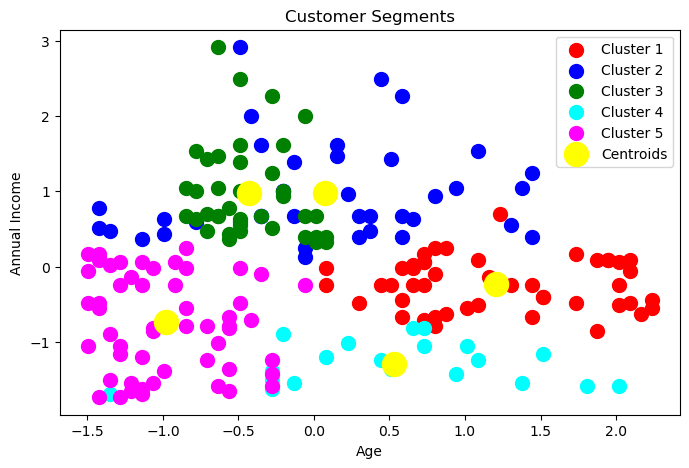

In [54]:
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()


In [64]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
cluster_summary = numeric_data.groupby(data['Cluster']).mean()
print(cluster_summary)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         83.872340  55.638298           54.382979               48.851064
1        159.743590  39.871795           86.102564               19.358974
2        161.025000  32.875000           86.100000               81.525000
3         24.100000  46.250000           26.750000               18.350000
4         55.648148  25.185185           41.092593               62.240741


In [66]:
non_numeric_data = data.select_dtypes(exclude=['float64', 'int64'])
mode_summary = non_numeric_data.groupby(data['Cluster']).agg(lambda x: x.mode()[0])
print(mode_summary)


         Gender  Cluster
Cluster                 
0        Female        0
1          Male        1
2        Female        2
3        Female        3
4        Female        4


In [68]:
print("Numeric Cluster Summary:\n", cluster_summary)
print("Non-Numeric Cluster Summary (Mode):\n", mode_summary)


Numeric Cluster Summary:
          CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         83.872340  55.638298           54.382979               48.851064
1        159.743590  39.871795           86.102564               19.358974
2        161.025000  32.875000           86.100000               81.525000
3         24.100000  46.250000           26.750000               18.350000
4         55.648148  25.185185           41.092593               62.240741
Non-Numeric Cluster Summary (Mode):
          Gender  Cluster
Cluster                 
0        Female        0
1          Male        1
2        Female        2
3        Female        3
4        Female        4


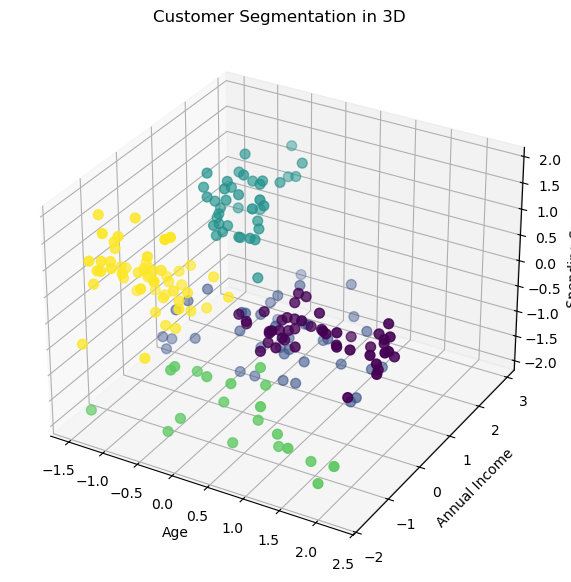

In [72]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=y_kmeans, s=50, cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Segmentation in 3D')
plt.show()



In [76]:
import joblib
joblib.dump(kmeans, 'kmeans_customer_segmentation_model.pkl')


['kmeans_customer_segmentation_model.pkl']